# scipy.stats
### Overview

*scipy.stats* is a statistics library for python. It contains a large number of probability distribution and statistical functions[1] 

For the sake of continuity, I will use the iris dataset to demonstrate some algorithms of the scipy.stats library, specifically t-tests and ANOVA (analysis of variants).

## Fisher’s Iris Dataset¶
Introduced by British statistician and biologist Ronald Fisher in his 1936 paper entitled “The use of multiple measurements in taxonomic problems”. It is an example of linear discriminate analysis. The dataset gives the measurements in centimetres of the sepal length and width and petal length and width of 50 flowers from each species of iris: setosa, versicolor, and virginica. The dataset contains a set of 150 records of 5 attributes: Sepal length in cm Sepal width in cm Petal length in cm Petal width in cm Species of iris: setosa, versicolor, virginica[2, 3]

## T TESTS

T-tests are used to "quantify the difference of arithmetic means between two samples of data" [11].
For example, if we wanted to observe two samples of petal length and try to determine whether or not they are from the same population of the same species or if the two samples are from different populations of the same species, we could run a t-test and figure that out [Ibid].

### Install Packages

In [15]:
# Efficient numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

# Alternative statistics package.
import statsmodels.stats.weightstats as stats

# Mains statistics package.
import scipy.stats as ss

# Plotting.
import matplotlib.pyplot as plt

# Fancier plotting.
import seaborn as sns

# Better sized plots.
plt.rcParams['figure.figsize'] = (12, 8)

# Nicer colours and styles for plots.
plt.style.use("ggplot")

## Importing the Data¶
Downloading the Iris dataset from the internet using the panda and sys libraries which will show the first few rows of data.

In [16]:
import sys
import pandas as pd
#Downloaded iris dataset from https://tinyurl.com/y8fovkyq

# sys.stdout = open("variables_summary.txt", "w")

iris_data = pd.read_csv('data.csv')

iris_data.columns = ['sepal_length', 'sepal_width',
                     'petal_length', 'petal_width', 'variety']

iris_data.head(10)

iris_data.shape
print(iris_data)

     sepal_length  sepal_width  petal_length  petal_width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]


## T-Test with Iris Dataset

In [17]:
# Load the iris data set 
iris_data = pd.read_csv('data.csv')

In [18]:
s = iris_data[iris_data['variety'] == 'Setosa']
r = iris_data[iris_data['variety'] == 'Versicolor']
a = iris_data[iris_data['variety'] == 'Virginica']

In [19]:
print(stats.ttest_ind(s['petal_length'], r['petal_length']))
print(stats.ttest_ind(s['petal_length'], a['petal_length']))
print(stats.ttest_ind(r['petal_length'], a['petal_length']))

print(stats.ttest_ind(s['petal_width'], r['petal_width']))
print(stats.ttest_ind(s['petal_width'], a['petal_width']))
print(stats.ttest_ind(r['petal_width'], a['petal_width']))

print(stats.ttest_ind(s['sepal_length'], r['sepal_length']))
print(stats.ttest_ind(s['sepal_length'], a['sepal_length']))
print(stats.ttest_ind(r['sepal_length'], a['sepal_length']))

print(stats.ttest_ind(s['sepal_width'], r['sepal_width']))
print(stats.ttest_ind(s['sepal_width'], a['sepal_width']))
print(stats.ttest_ind(r['sepal_width'], a['sepal_width']))

(-39.4927193915381, 5.404910513441677e-62, 98.0)
(-49.98618625709594, 1.5048006992427275e-71, 98.0)
(-12.603779441384978, 3.1788195478062863e-22, 98.0)
(-34.080341543577205, 3.831095388247998e-56, 98.0)
(-42.785797519617184, 3.230374818431894e-65, 98.0)
(-14.62536704741013, 2.230409071025008e-26, 98.0)
(-10.52098626754912, 8.985235037486755e-18, 98.0)
(-15.386195820079424, 6.892546060673468e-28, 98.0)
(-5.62916525971981, 1.724856302454731e-07, 98.0)
(9.454975848128605, 1.84525994547684e-15, 98.0)
(6.450349089630736, 4.246355381844788e-09, 98.0)
(-3.2057607502218186, 0.0018191004238894803, 98.0)


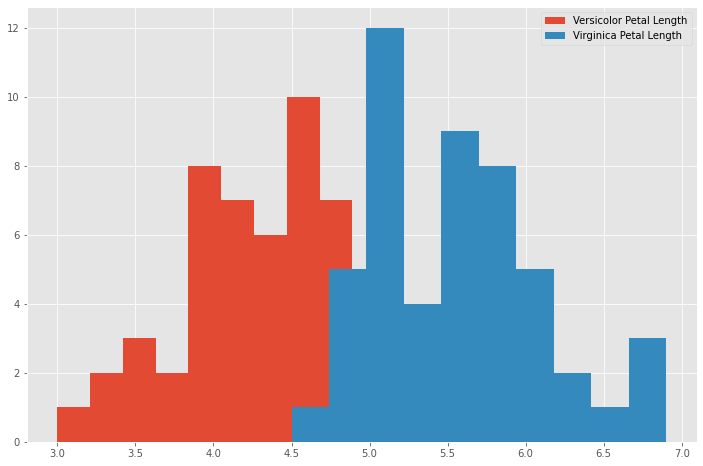

In [20]:
plt.hist(r['petal_length'], label='Versicolor Petal Length')
plt.hist(a['petal_length'], label='Virginica Petal Length')

plt.legend()

plt.show()

In [11]:
1- ((0.95)**12)

0.45963991233736334

In [30]:
ss.f_oneway(s['petal_length'], r['petal_length'], a['petal_length'])

F_onewayResult(statistic=1180.161182252981, pvalue=2.8567766109615584e-91)

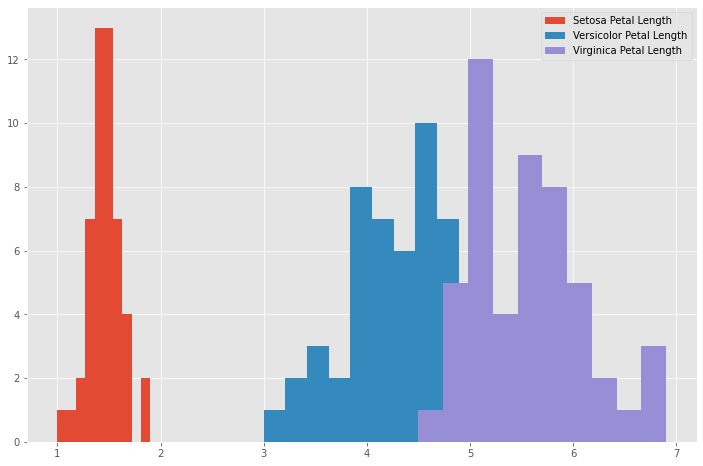

In [13]:
plt.hist(s['petal_length'], label='Setosa Petal Length')
plt.hist(r['petal_length'], label='Versicolor Petal Length')
plt.hist(a['petal_length'], label='Virginica Petal Length')

plt.legend()

plt.show()

# ANOVA (one-way)

https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php
 

"The one-way analysis of variance (ANOVA) is used to determine whether there are any statistically significant differences between the means of two or more independent (unrelated) groups (although you tend to only see it used when there are a minimum of three, rather than two groups)"[12]. In our case there are four numerical variables (sepal length, sepal width, petal length, and petal width) and 1 categorical variable (species - setosa, virginica, and versicolor).

#### First thing to do will be to choose our independent and dependent variables from the data set.

## Import Libraries

In [2]:

# Data frames.
import pandas as pd

# Plotting.
import seaborn as sns

# Stats.
import scipy.stats as ss

# Numerical arrays.
import numpy as np

# Collections.
import collections as co

# Specials.
import scipy.special as spec

## Import Dataset

In [3]:
# Load the iris data set 
iris_data = pd.read_csv('data.csv')

#### Next step is to determine our assumptions based off of the requirement assumptions for ANOVA per: https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php

### Assumption 1: Dependent variable

In [4]:
# The dependent variable.
dependent = iris_data['petal_length']
dependent

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: petal_length, Length: 150, dtype: float64

In [5]:
dependent.describe()

count    150.000000
mean       3.758000
std        1.765298
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: petal_length, dtype: float64

### Assumption 2: Independent variable

In [6]:
# Independent variable.
independent = iris_data['variety']
independent

0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: variety, Length: 150, dtype: object

### Assumption 4: Outliers

Ideally there should be no significant outliers in our data.

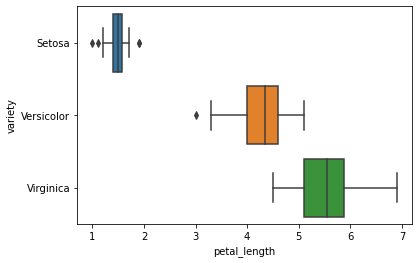

In [7]:
# https://seaborn.pydata.org/generated/seaborn.boxplot.html
sns.boxplot(x=dependent, y=independent)

#### In the above boxplot, we can see that there are a few outliers, one for the versicolor and three for the setosa.

### Assumption 5: Normality
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

https://statistics.laerd.com/spss-tutorials/testing-for-normality-using-spss-statistics.php

The normality assumption has to do with normal distribution. We use the Shapiro-Wilk test to check for normal distribution of our data and hope to see a 'bell curve' in our plot.

In [8]:
# Extract the setosa petal lengths.
petal_len_setosa = dependent[independent == 'Setosa']
petal_len_setosa

0     1.4
1     1.4
2     1.3
3     1.5
4     1.4
5     1.7
6     1.4
7     1.5
8     1.4
9     1.5
10    1.5
11    1.6
12    1.4
13    1.1
14    1.2
15    1.5
16    1.3
17    1.4
18    1.7
19    1.5
20    1.7
21    1.5
22    1.0
23    1.7
24    1.9
25    1.6
26    1.6
27    1.5
28    1.4
29    1.6
30    1.6
31    1.5
32    1.5
33    1.4
34    1.5
35    1.2
36    1.3
37    1.4
38    1.3
39    1.5
40    1.3
41    1.3
42    1.3
43    1.6
44    1.9
45    1.4
46    1.6
47    1.4
48    1.5
49    1.4
Name: petal_length, dtype: float64

In [9]:
# Run the Shapiro-Wilk test.
ss.shapiro(petal_len_setosa)

ShapiroResult(statistic=0.9549766182899475, pvalue=0.05481043830513954)

In [10]:
# Run the test for the versicolors.
ss.shapiro(dependent[independent == 'Versicolor'])

ShapiroResult(statistic=0.9660047888755798, pvalue=0.1584833413362503)

In [11]:
# Run the test for the virginica.
ss.shapiro(dependent[independent == 'Virginica'])

ShapiroResult(statistic=0.9621862769126892, pvalue=0.10977369546890259)

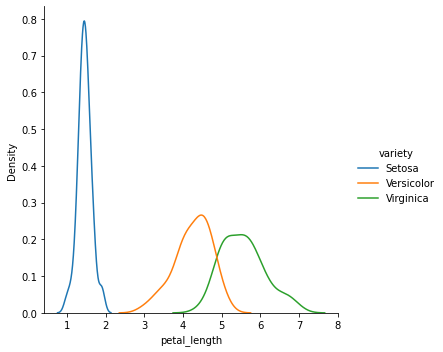

In [12]:
# Kernel Density Estimators of the three categories.
sns.displot(x=dependent, hue=independent, kind="kde")

#### After running the Shapiro-Wilk test, we can see both numerically and graphically that our data is normally distributed.

### Assumption 6: Homogeneity of Variances
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html

To test whether or not the variances are the same, we'll use the Levene Test.
This test "tests the null hypothesis that all input samples are from populations with equal variances"[15].

https://statistics.laerd.com/statistical-guides/independent-t-test-statistical-guide.php

In [26]:
# Test for equal variances.
ss.levene(
    dependent[independent == 'Setosa'],
    dependent[independent == 'Versicolor'],
    dependent[independent == 'Virginica']
)

LeveneResult(statistic=19.480338801923573, pvalue=3.1287566394085344e-08)

### One-way ANOVA
As the boxplot above shows that there are outliers in Assumption 4 and we can see in the Levene test in Assumption 6, the variances are not equal. Therefore we'll run the one-way ANOVA to test if the mean petal lengths across all three species are the same.

In [13]:
# ANOVA.
ss.f_oneway(
    dependent[independent == 'Setosa'],
    dependent[independent == 'Versicolor'],
    dependent[independent == 'Virginica']
)

F_onewayResult(statistic=1180.161182252981, pvalue=2.8567766109615584e-91)

#### Conclusion: the mean petal lengths of setosas, versicolors, and virginicas are different.

### Unequal Variances
https://github.com/scipy/scipy/issues/11122#issuecomment-587964214

Since the variances are not homogeneous, we must in this case run a Welch ANOVA test:
"Welch’s ANOVA compares two means to see if they are equal. It is an alternative to the Classic ANOVA and can be used even if your data violates the assumption of homogeneity of variances.

You should run Welch’s test in all cases where you have normally distributed data that violates the assumption of homogeneity of variance"[14]. 

In [28]:
#Code copied directly from Dr. Ian McLoughlin's NoteBook. 

def welch_anova_np(*args, var_equal=False):
    # https://svn.r-project.org/R/trunk/src/library/stats/R/oneway.test.R
    # translated from R Welch ANOVA (not assuming equal variance)

    F_onewayResult = co.namedtuple('F_onewayResult', ('statistic', 'pvalue'))

    args = [np.asarray(arg, dtype=float) for arg in args]
    k = len(args)
    ni = np.array([len(arg) for arg in args])
    mi = np.array([np.mean(arg) for arg in args])
    vi = np.array([np.var(arg,ddof=1) for arg in args])
    wi = ni/vi

    tmp =sum((1-wi/sum(wi))**2 / (ni-1))
    tmp /= (k**2 -1)

    dfbn = k - 1
    dfwn = 1 / (3 * tmp)

    m = sum(mi*wi) / sum(wi)
    f = sum(wi * (mi - m)**2) /((dfbn) * (1 + 2 * (dfbn - 1) * tmp))
    prob = spec.fdtrc(dfbn, dfwn, f)   # equivalent to stats.f.sf
    return F_onewayResult(f, prob)

In [29]:
# Perform the test.
welch_anova_np(
    dependent[independent == 'Setosa'],
    dependent[independent == 'Versicolor'],
    dependent[independent == 'Virginica']
)

F_onewayResult(statistic=1828.0919450856877, pvalue=2.693327358715152e-66)

#### Conclusion: the mean petal lengths of setosas, versicolors, and virginicas are different.

## References

This project is based predominantly on the lecture materials given by Dr. Ian McLoughlin - not explicitly quoted in the body of the notebook, but referenced in the below list.

1. Statistical functions (scipy.stats) — scipy v1.7.1 manual,” 2021. [Online]. Available:
https://docs.scipy.org/doc/scipy/reference/stats.html

2.	https://en.wikipedia.org/wiki/Iris_flower_data_set
3.	https://github.com/RitRa/Project2018-iris/blob/master/Project%2B2018%2B-%2BFishers%2BIris%2Bdata%2Bset%2Banalysis.ipynb
4.	https://tableconvert.com/?output=csv&data=https://gist.github.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv
5.	https://realpython.com/python-csv/
6.	https://stackoverflow.com/questions/1526607/extracting-data-from-a-csv-file-in-python
7.	https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
8. https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/main/ttest.ipynb
9. https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/main/anova.ipynb
10. https://www.qualtrics.com/uk/experience-management/research/anova/
11. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
12. https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php
13. https://github.com/ianmcloughlin/python_anova/blob/main/one_way_anova.ipynb
14. https://www.statisticshowto.com/welchs-anova/
15. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html
16. https://statistics.laerd.com/statistical-guides/independent-t-test-statistical-guide.php
17. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html
18. https://statistics.laerd.com/spss-tutorials/testing-for-normality-using-spss-statistics.php
19. https://statistics.laerd.com/spss-tutorials/independent-t-test-using-spss-statistics.php

# End